<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin_Lukan_Matplolib_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

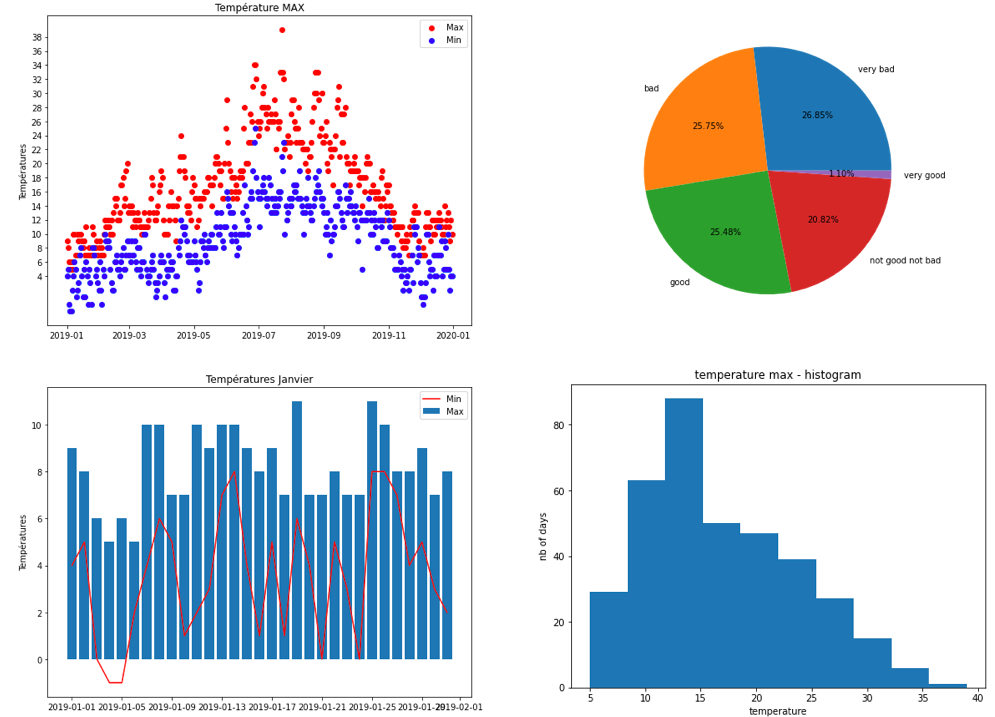

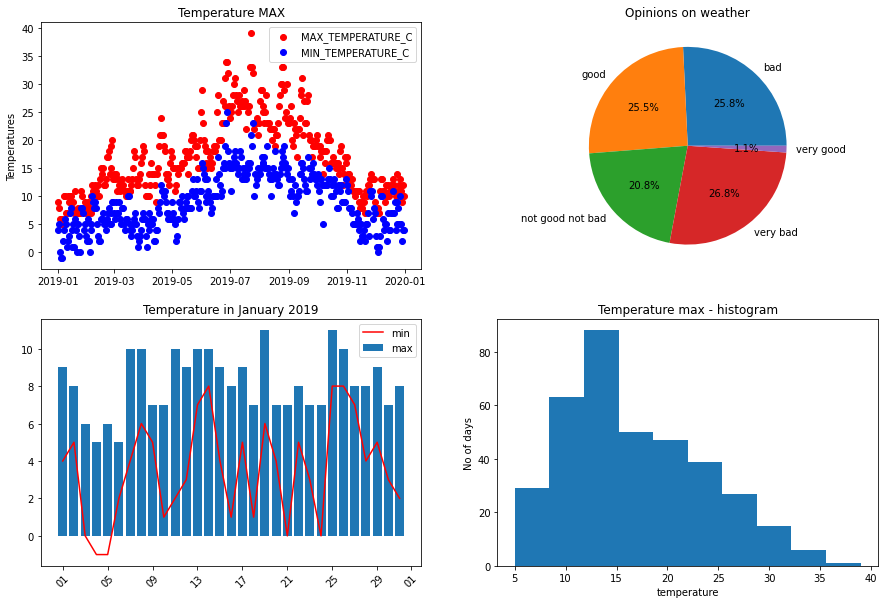

In [50]:
# Visualize support vectors vs sepal data
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d')

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax1=plt.subplot(2,2,1)
ax1.scatter(data=df_weather,x='DATE',y= 'MAX_TEMPERATURE_C',color='red')
ax1.scatter(data=df_weather,x='DATE', y='MIN_TEMPERATURE_C',color='blue')
ax1.set_title('Temperature MAX')
ax1.legend(loc='upper right')
ax1.set_ylabel('Temperatures')
counts = df_weather.groupby('OPINION')['OPINION'].count()
ax2=plt.subplot(2,2,2)
ax2.pie(counts,labels=counts._index,autopct='%1.1f%%')
ax2.set_title('Opinions on weather')

ax3=plt.subplot(2,2,3)
ax3.bar(data=df_weather[df_weather['DATE']<'2019-02'],x='DATE',height='MAX_TEMPERATURE_C')
ax3.plot(df_weather[df_weather['DATE']<'2019-02']['DATE'],df_weather[df_weather['DATE']<'2019-02']['MIN_TEMPERATURE_C'],color='red')
ax3.legend(loc='upper right',labels=['min','max'])
ax3.set_xticklabels(ax3.get_xticks(), rotation = 45)
ax3.set_title('Temperature in January 2019')
ax3.xaxis.set_major_formatter(myFmt)

ax4=plt.subplot(2,2,4)
ax4.hist(df_weather['MAX_TEMPERATURE_C'])
ax4.set_title('Temperature max - histogram')
ax4.set_ylabel('No of days')
ax4.set_xlabel('temperature')

plt.show();


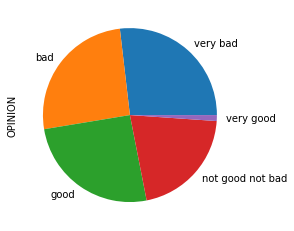

In [57]:
# Complete the code below :
df_weather['OPINION'].value_counts().plot.pie();


## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

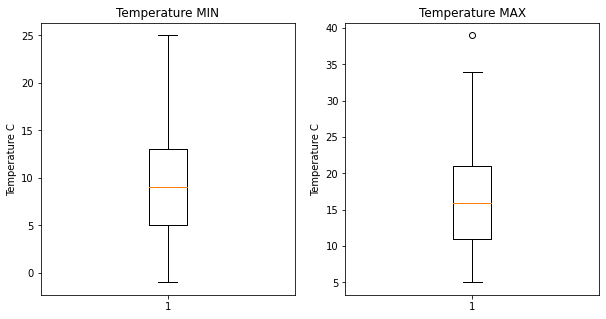

In [56]:
# Your code here :

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))

ax1=plt.subplot(1,2,1)
ax1.boxplot(df_weather['MIN_TEMPERATURE_C'])
ax1.set_title('Temperature MIN')
ax1.set_ylabel('Temperature C')
ax2=plt.subplot(1,2,2)
ax2.boxplot(df_weather['MAX_TEMPERATURE_C'])
ax2.set_title('Temperature MAX')
ax2.set_ylabel('Temperature C')
plt.show();
#Max temperature has an outlier

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

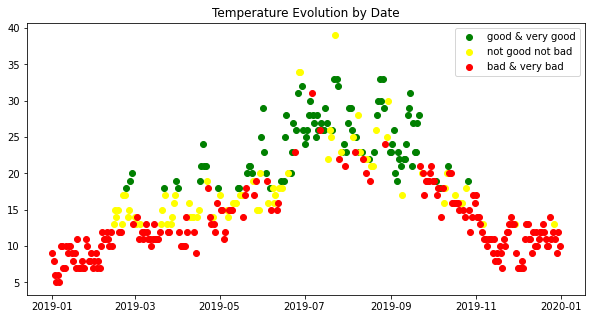

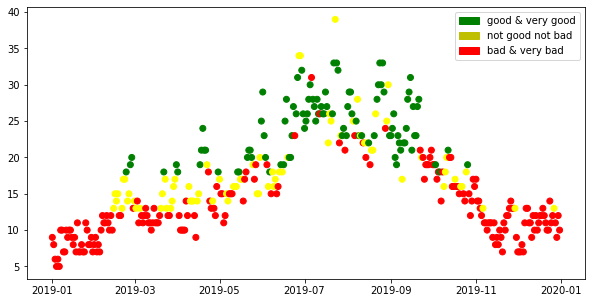

In [86]:
# It's your turn now :
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
figure(figsize=(10, 5))
legend_elements = [mpatches.Patch(color='g', label='good & very good'),mpatches.Patch(color='y', label='not good not bad'),mpatches.Patch(color='r', label='bad & very bad')]

#colors= {'very bad':'red', 'bad':'red', 'not good not bad':'yellow', 'good':'green', 'very good':'green'}
plt.scatter(data=df_weather,x='DATE',y='MAX_TEMPERATURE_C',c=df_weather['OPINION'].map(colors))
plt.legend(loc='upper right',handles=legend_elements)
plt.show()
